In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

 # Подготовка данных (0-й этап)

In [306]:
path = "данные для обработки.xlsx"
try:
    df = pd.read_excel(path)
except:
    raise FileNotFoundError('Файл не найден')

In [307]:
def data_preview(data):
    display(data.sample(5))
    print("-" * 100)
    data.info()
    print("-" * 100)
    print("Пропуски в данных")
    display(data.isna().mean().sort_values(ascending=False))
    print("-" * 100)
    print(f"Количество явных дубликатов - {data.duplicated().sum()}")
    print("-" * 100)
    display(data.describe())
    print("-" * 100)
    print("-" * 100)

In [308]:
data_preview(df)

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
532,1,3,3,19,24,18,89,2,31,87,85,55,98,18,21
863,1,3,4,89,95,50,51,45,94,48,36,4,30,24,16
4,1,3,6,79,4,87,89,22,13,74,30,59,56,82,15
163,2,3,8,83,4,0,37,17,21,80,72,47,91,39,19
20,1,3,6,94,91,94,51,54,66,55,43,66,2,2,21


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Пол                1034 non-null   object
 1   Образование        1034 non-null   object
 2   Уровень должности  1034 non-null   int64 
 3   Настороженность    1034 non-null   int64 
 4   Расчётливость      1034 non-null   int64 
 5   Жёсткость          1034 non-null   int64 
 6   Независимость      1034 non-null   int64 
 7   Авантюризм         1034 non-null   int64 
 8   Непрактичность     1034 non-null   int64 
 9   Осторожность       1034 non-null   int64 
 10  Нормативность      1034 non-null   int64 
 11  Жертвенность       1034 non-null   int64 
 12  Эмоциональность    1034 non-null   int64 
 13  Расслабленность    1034 non-null   int64 
 14  Безынициативность  1034 non-null   

Пол                  0.0
Образование          0.0
Уровень должности    0.0
Настороженность      0.0
Расчётливость        0.0
Жёсткость            0.0
Независимость        0.0
Авантюризм           0.0
Непрактичность       0.0
Осторожность         0.0
Нормативность        0.0
Жертвенность         0.0
Эмоциональность      0.0
Расслабленность      0.0
Безынициативность    0.0
dtype: float64

----------------------------------------------------------------------------------------------------
Количество явных дубликатов - 0
----------------------------------------------------------------------------------------------------


,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,3.344294,66.211799,48.596712,50.358801,58.043520,46.680851,46.900387,58.361702,62.679884,44.210832,38.969052,32.755319,43.552224
std,1.665501,27.592643,29.732184,31.919427,30.309265,30.143745,28.629839,24.422403,28.372454,33.106944,27.561337,27.171377,29.016397
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,47.000000,24.000000,20.000000,32.000000,17.000000,21.000000,40.000000,39.000000,12.000000,20.000000,10.000000,21.000000
50%,3.000000,73.000000,50.000000,53.000000,54.000000,43.000000,47.000000,59.000000,70.000000,44.000000,34.000000,28.000000,33.000000
75%,4.000000,88.000000,74.000000,81.000000,89.000000,71.000000,69.000000,80.000000,89.000000,78.000000,63.000000,50.000000,70.000000
max,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [309]:
df['Пол'].value_counts()

Пол
1       691
2       342
1, 1      1
Name: count, dtype: int64

In [310]:
df.loc[df['Пол'] == '1, 1', 'Пол'] = 1
df['Пол'] = pd.to_numeric(df['Пол'], errors='coerce')
df['Пол'].value_counts()

Пол
1    692
2    342
Name: count, dtype: int64

In [311]:
df['Образование'].value_counts()

Образование
3       731
4       214
2        76
1        12
3, 3      1
Name: count, dtype: int64

In [312]:
df.loc[df['Образование'] == '3, 3', 'Образование'] = 3
df['Образование'] = pd.to_numeric(df['Образование'], errors='coerce')
df['Образование'].value_counts()

Образование
3    732
4    214
2     76
1     12
Name: count, dtype: int64

In [313]:
data_preview(df)

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
842,1,3,3,83,39,70,23,11,83,67,91,35,32,0,21
167,2,3,2,4,14,81,29,54,55,48,70,66,91,68,21
612,2,3,3,96,93,67,50,32,18,82,81,2,34,11,0
89,1,3,6,64,4,4,36,43,31,52,57,100,77,43,56
295,1,2,2,55,27,87,37,22,20,94,57,87,85,33,80


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                1034 non-null   int64
 1   Образование        1034 non-null   int64
 2   Уровень должности  1034 non-null   int64
 3   Настороженность    1034 non-null   int64
 4   Расчётливость      1034 non-null   int64
 5   Жёсткость          1034 non-null   int64
 6   Независимость      1034 non-null   int64
 7   Авантюризм         1034 non-null   int64
 8   Непрактичность     1034 non-null   int64
 9   Осторожность       1034 non-null   int64
 10  Нормативность      1034 non-null   int64
 11  Жертвенность       1034 non-null   int64
 12  Эмоциональность    1034 non-null   int64
 13  Расслабленность    1034 non-null   int64
 14  Безынициативность  1034 non-null   int64
dtypes: in

Пол                  0.0
Образование          0.0
Уровень должности    0.0
Настороженность      0.0
Расчётливость        0.0
Жёсткость            0.0
Независимость        0.0
Авантюризм           0.0
Непрактичность       0.0
Осторожность         0.0
Нормативность        0.0
Жертвенность         0.0
Эмоциональность      0.0
Расслабленность      0.0
Безынициативность    0.0
dtype: float64

----------------------------------------------------------------------------------------------------
Количество явных дубликатов - 0
----------------------------------------------------------------------------------------------------


,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,1.330754,3.110251,3.344294,66.211799,48.596712,50.358801,58.043520,46.680851,46.900387,58.361702,62.679884,44.210832,38.969052,32.755319,43.552224
std,0.470712,0.561280,1.665501,27.592643,29.732184,31.919427,30.309265,30.143745,28.629839,24.422403,28.372454,33.106944,27.561337,27.171377,29.016397
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,47.000000,24.000000,20.000000,32.000000,17.000000,21.000000,40.000000,39.000000,12.000000,20.000000,10.000000,21.000000
50%,1.000000,3.000000,3.000000,73.000000,50.000000,53.000000,54.000000,43.000000,47.000000,59.000000,70.000000,44.000000,34.000000,28.000000,33.000000
75%,2.000000,3.000000,4.000000,88.000000,74.000000,81.000000,89.000000,71.000000,69.000000,80.000000,89.000000,78.000000,63.000000,50.000000,70.000000
max,2.000000,4.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


# 1-й этап

## Анализ каждого признака

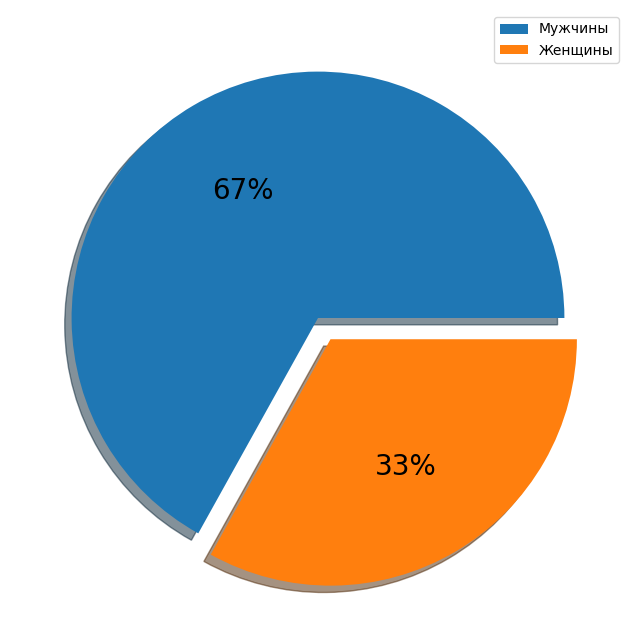

In [314]:
plt.figure(figsize=(8,8))
plt.pie(df['Пол'].value_counts(), explode=[0, 0.1], shadow=True, autopct='%1.0f%%', textprops={'fontsize': 20})
plt.legend(['Мужчины', 'Женщины'])
plt.show()

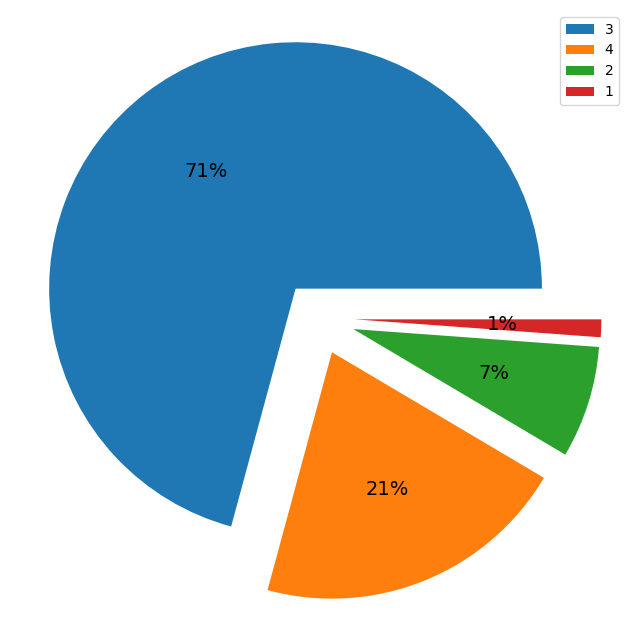

In [315]:
plt.figure(figsize=(8,8))
plt.pie(df['Образование'].value_counts(), explode=[0.15, 0.15, 0.15, 0.15], autopct='%1.0f%%', textprops={'fontsize': 14})
plt.legend(df['Образование'].value_counts().index)
plt.show()

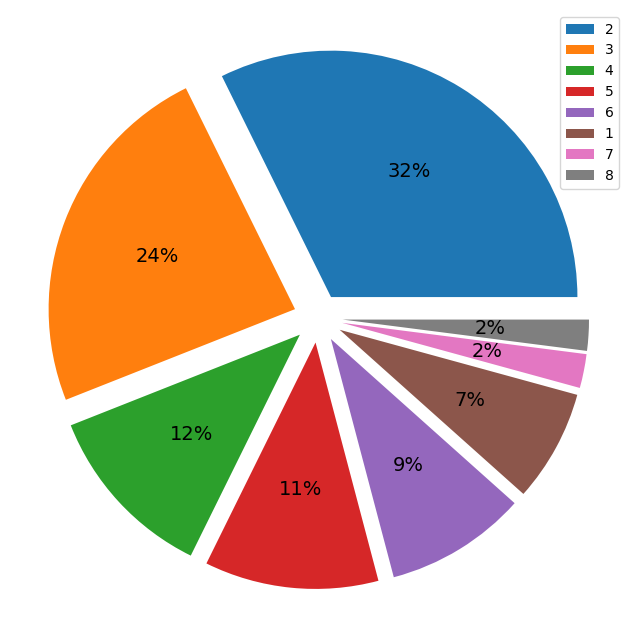

In [316]:
plt.figure(figsize=(8,8))
plt.pie(df['Уровень должности'].value_counts(), explode=[0.1]*8, autopct='%1.0f%%', textprops={'fontsize': 14})
plt.legend(df['Уровень должности'].value_counts().index)
plt.show()

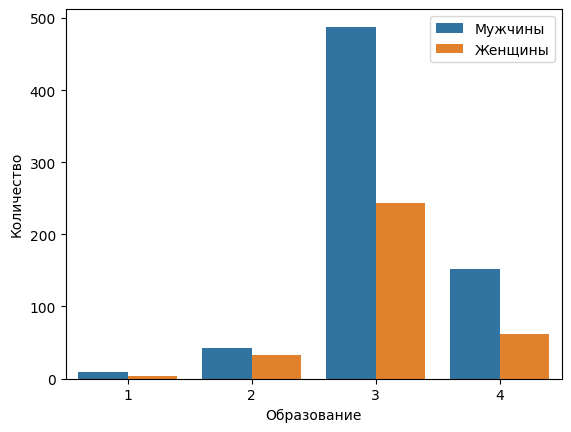

In [317]:
sns.countplot(data=df, x='Образование', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

Заметим, что сохраняется отношение между количеством мужчин и женщин вне зависимости от образования

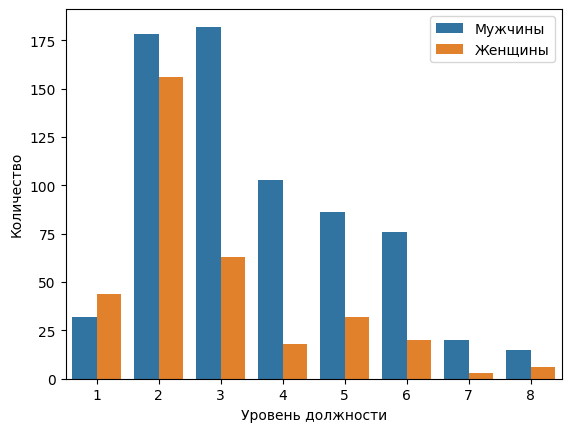

In [318]:
sns.countplot(data=df, x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

При помощи исследовательского анализа данных была доказана 4 гипотеза

# 2-й этап

In [319]:
rho, p = spearmanr(df['Образование'], df['Уровень должности'])
rho

0.24030309644259953

Делаем вывод, что Образование и Уровень должности слабо коллеририющие

# 3-й этап

In [359]:
scaler = MinMaxScaler()
X = df.iloc[:, 3:]
X = scaler.fit_transform(X)

In [410]:
model = KMeans(n_clusters=6)
gm_4 = model.fit(X)
predict_4 = gm_4.predict(X)

d:\projects\expert_judgement\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [411]:
clusters = np.unique(predict_4)
clusterd_df = []
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(predict_4 == cluster)
	clusterd_df.append(df.iloc[list(*row_ix)])

clusterd_df[0].head()

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
2,2,4,5,84,26,87,26,22,36,34,57,45,30,27,80
33,1,3,6,89,50,60,23,40,13,63,70,78,32,2,44
45,2,3,6,94,43,60,98,6,21,73,91,16,32,28,17
47,1,3,5,87,69,87,96,11,13,100,86,47,2,0,37
54,1,3,6,94,50,81,19,17,1,33,98,19,56,30,66


In [407]:
columns = df.columns[3:]

def find_variance(df, column):
    return np.var(df[column])

In [412]:
for column in columns:
    var = find_variance(clusterd_df[0], column)
    print(f'{column} var={var}')

Настороженность var=256.2834767177193
Расчётливость var=577.7485436518654
Жёсткость var=394.6715790285869
Независимость var=738.8257397476948
Авантюризм var=262.12908452605996
Непрактичность var=672.8579144323137
Осторожность var=400.0128081478338
Нормативность var=487.8027853863663
Жертвенность var=745.9810192508005
Эмоциональность var=658.3756027931022
Расслабленность var=466.453609042861
Безынициативность var=685.674549592994


<Axes: xlabel='Настороженность', ylabel='Count'>

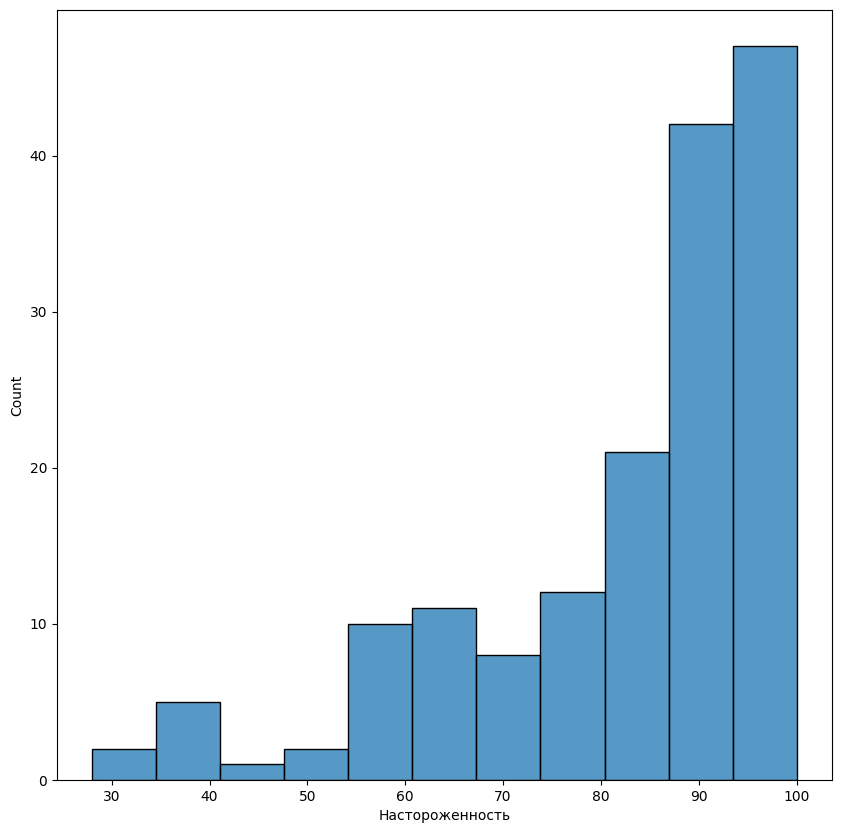

In [413]:
plt.figure(figsize=(10, 10))
sns.histplot(data=clusterd_df[0], x='Настороженность')

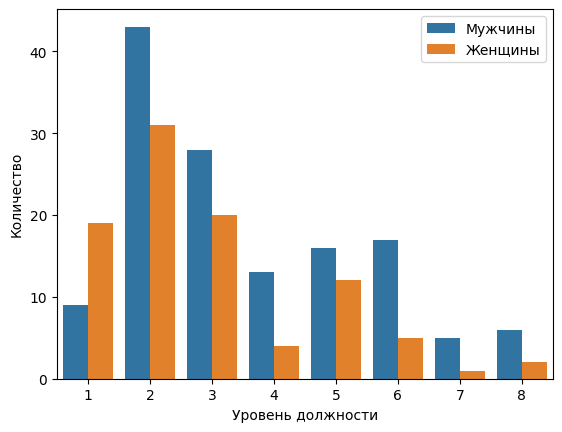

In [377]:
sns.countplot(data=clusterd_df[0], x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

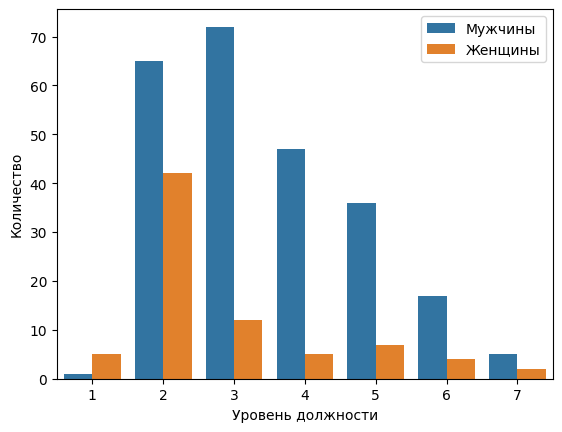

In [375]:
sns.countplot(data=clusterd_df[1], x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

In [376]:
for column in columns:
    var = find_variance(clusterd_df[1], column)
    print(f'{column} var={var}')

Настороженность var=825.94375
Расчётливость var=617.4965234375
Жёсткость var=904.8255859375
Независимость var=831.5428808593749
Авантюризм var=708.205615234375
Непрактичность var=694.3968359375
Осторожность var=368.078125
Нормативность var=266.633896484375
Жертвенность var=438.4718359375
Эмоциональность var=545.604990234375
Расслабленность var=407.79984375
Безынициативность var=633.2918359375


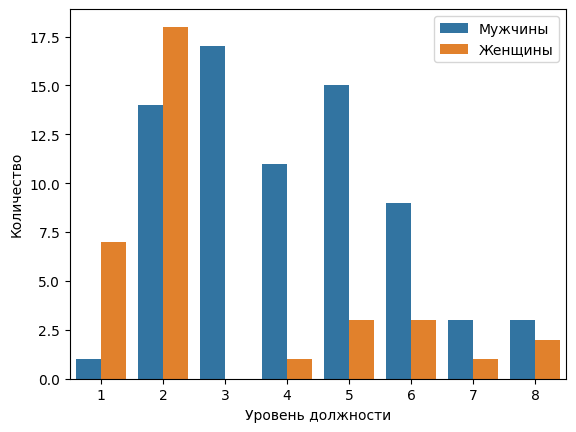

In [327]:
sns.countplot(data=clusterd_df[2], x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

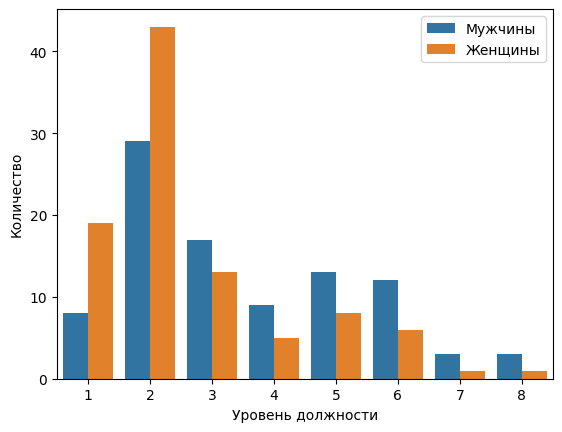

In [328]:
sns.countplot(data=clusterd_df[3], x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

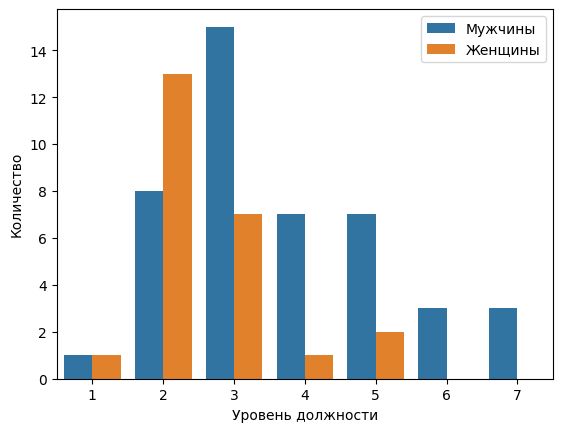

In [329]:
sns.countplot(data=clusterd_df[4], x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

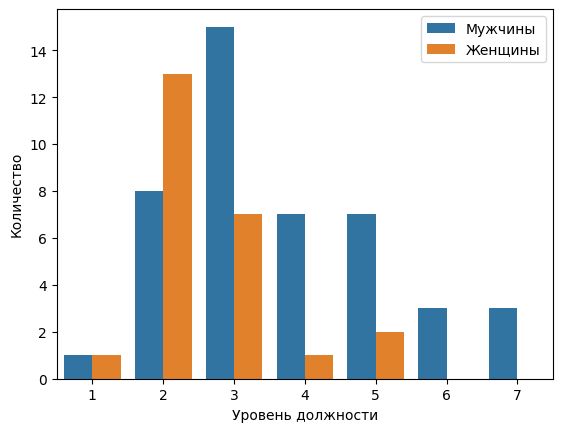

In [330]:
sns.countplot(data=clusterd_df[4], x='Уровень должности', hue='Пол')
plt.ylabel('Количество')
plt.legend(['Mужчины', 'Женщины'])
plt.show()

<Axes: >

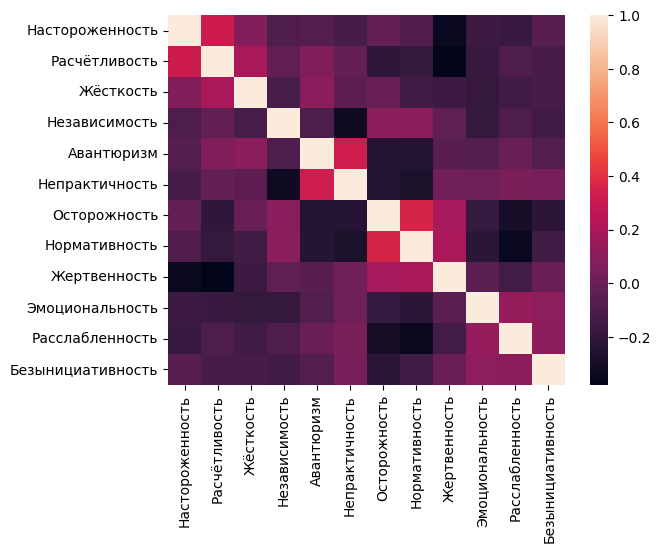

In [331]:
sns.heatmap(df.iloc[:, 3:].corr())